**Problem Statement**


Through analysis on the bike-sharing dataset, Is it possible to predict the bike rides count, based on that day’s weather condition and seasonal settings? How well would this model predict the rides count of any given day?

To address the above problem, the analysis from the previous Jupyter notebook is extended here. The trends that are identified in the previous notebook are validated using in the best model application over the data set. As we are trying to predict the bike rides count, which is a numeric quantity, the model that we are going to choose for this data set will lie in the 'Regression' based algorithms. Hence trying the following regression model algorithms to identify the best one.

•	Linear Regression

•	SGD Regression

•	Logistic Regression

•	Random forest Regression

•	Lasso Regression




In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
ls

drive/  ridesdata.csv  sample_data/


The CSV file (rides data) that is saved into the drive location after the initial analysis in the previous notebook. It is fetched to continue with further analysis in model identification.

In [0]:
path='/content/ridesdata.csv'

ridesdata=pd.read_csv(path)

#ridesdata.info()

In [47]:
X1=ridesdata.iloc[:,0:-3]

Y1=ridesdata.rides_count

print(X1.head())
print(Y1.head())

   Id    Datetime  season  year  ...      temp     atemp  Humidity  windspeed
0   1  2011-01-01       1     0  ...  0.344167  0.363625  0.805833   0.160446
1   2  2011-01-02       1     0  ...  0.363478  0.353739  0.696087   0.248539
2   3  2011-01-03       1     0  ...  0.196364  0.189405  0.437273   0.248309
3   4  2011-01-04       1     0  ...  0.200000  0.212122  0.590435   0.160296
4   5  2011-01-05       1     0  ...  0.226957  0.229270  0.436957   0.186900

[5 rows x 13 columns]
0     985
1     801
2    1349
3    1562
4    1600
Name: rides_count, dtype: int64


5 categorical features are included in the independent features set, to fit in the model. As these categorical features have the boolean type of data within, it is an efficient approach to split the boolean type features into multiple independent features as input data for the model.

In [0]:
#splitting the dataset features into numeric and categorical columns.

features=ridesdata[['season','Month','year','weekday','is_holiday','is_workingday',
                          'Weather_condition','Humidity','temp','windspeed']]

cat=['season','is_holiday','is_workingday','Weather_condition','year']
num=['temp','windspeed','Humidity','month','weekday']

In [49]:
X1=pd.get_dummies(features,columns=cat)
print('The transformed dataframe for modelling is : ',X1.shape)

X1.info()

The transformed dataframe for modelling is :  (731, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 18 columns):
Month                  731 non-null int64
weekday                731 non-null int64
Humidity               731 non-null float64
temp                   731 non-null float64
windspeed              731 non-null float64
season_1               731 non-null uint8
season_2               731 non-null uint8
season_3               731 non-null uint8
season_4               731 non-null uint8
is_holiday_0           731 non-null uint8
is_holiday_1           731 non-null uint8
is_workingday_0        731 non-null uint8
is_workingday_1        731 non-null uint8
Weather_condition_1    731 non-null uint8
Weather_condition_2    731 non-null uint8
Weather_condition_3    731 non-null uint8
year_0                 731 non-null uint8
year_1                 731 non-null uint8
dtypes: float64(3), int64(2), uint8(13)
memory usage: 37.9 KB


In [50]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression().fit(X1,Y1)

print("Accuracy of linear regression model is :",lr.score(X1,Y1)*100)

Accuracy of linear regression model is : 82.74320870924804


In [51]:
from sklearn.linear_model import LogisticRegression

lo=LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(X1,Y1)

print("Accuray of logistic regression model is :",lo.score(X1,Y1)*100)

Accuray of logistic regression model is : 34.33652530779754


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [52]:
from sklearn.linear_model import Lasso

la=Lasso(alpha=0.1).fit(X1,Y1)

print("Accuracy of lasso regression model is: ",la.score(X1,Y1)*100)

Accuracy of lasso regression model is:  82.74306092165527


In [53]:
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor(max_iter=1000, tol=1e-3)
sgd.fit(X1, Y1)

print("Accuracy of SGD regression model is: ",sgd.score(X1,Y1)*100)

Accuracy of SGD regression model is:  78.96134573995403


In [54]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(n_estimators=1000, random_state=42)
rf.fit(X1,Y1)

print("Accuracy of Random forest regression model is : ",rf.score(X1,Y1)*100)

Accuracy of Random forest regression model is :  98.41861262341051


In [0]:
#sample 20 records to check the predicted targets by each of the regression model
xt = X1[:20]

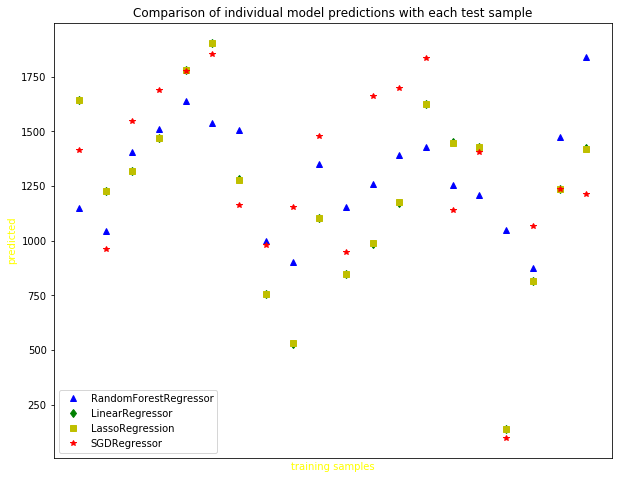

In [56]:
plt.figure(figsize=(10,8))

plt.plot(rf.predict(xt), 'b^', label='RandomForestRegressor')
plt.plot(lr.predict(xt), 'gd', label='LinearRegressor')
plt.plot(la.predict(xt), 'ys', label='LassoRegression')
plt.plot(sgd.predict(xt), 'r*', label='SGDRegressor')
plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('predicted', color='yellow')
plt.xlabel('training samples',color='yellow')
plt.legend(loc="best")
plt.title('Comparison of individual model predictions with each test sample')
plt.show()

In the above comparison plot, the random forest regressor label is a stand out label is in each of the 20 samples. Of all the other models, the predicted values of the random forest regression model from the test data set, are much closer to the actual target values (rides count) when compared in the dataset. As verified, it predicts the target with an accuracy of 98.3%

**Random Forest Regression implementation**

Based on the accuracy scores obtained from the above models, it is clear that the Random Forest Regression algorithm is giving the best maximum results in the model. Let's have a detailed view of this algorithm. The initial step in the implementation is to divide the rides data into a training data set and testing data sets. 
So dividing and randomizing the data set for train and test in the ratio of 80:20

In [0]:
# Split data into train and test dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(ridesdata.iloc[:,0:-3], 
                   ridesdata.rides_count, test_size = 0.2, random_state = 42)

In [0]:
train_features=x_train[['season', 'Month', 'year', 'weekday', 'is_holiday',
                        'is_workingday', 'Weather_condition', 'Humidity', 'temp',
                        'windspeed']]
test_features=x_test[['season', 'Month', 'year', 'weekday', 'is_holiday', 
                      'is_workingday', 'Weather_condition', 'Humidity', 'temp',
                      'windspeed']]


cat_features=['season','is_holiday','is_workingday','Weather_condition','year']
num_features=['temp','windspeed','Humidity','month','weekday']

In [0]:
#Reset train data index values
x_train=x_train.reset_index(inplace=True)
y_train=y_train.reset_index()

# Reset test data index values
x_test=x_test.reset_index(inplace=True)
y_test=y_test.reset_index()

Separating the features into categorical and numerical types so that the categorical features can be split into multiple features for a better explanation of results on the axis.


In [60]:
#transforming the categorical variables into numerical form for the training data sets.

X=pd.get_dummies(train_features,columns=cat_features)

Y=y_train.rides_count.values

print('Shape of training dataframe:',X.shape)
print('Shape of training target:',Y.shape)

Shape of training dataframe: (584, 18)
Shape of training target: (584,)


In [61]:
X.head(5)

,Month,weekday,Humidity,temp,windspeed,season_1,season_2,season_3,season_4,is_holiday_0,is_holiday_1,is_workingday_0,is_workingday_1,Weather_condition_1,Weather_condition_2,Weather_condition_3,year_0,year_1
682,11,2,0.662917,0.343333,0.342046,0,0,0,1,1,0,0,1,0,1,0,0,1
250,9,4,0.939565,0.633913,0.192748,0,0,1,0,1,0,0,1,0,0,1,1,0
336,12,6,0.612917,0.299167,0.095783,0,0,0,1,1,0,1,0,1,0,0,1,0
260,9,0,0.695000,0.507500,0.178483,0,0,1,0,1,0,1,0,1,0,0,1,0
543,6,3,0.360000,0.697500,0.271775,0,0,1,0,1,0,0,1,1,0,0,0,1


In [0]:
#transforming the categorical variables into numerical form for the testing data sets.

X_t=pd.get_dummies(test_features,columns=cat_features)

y_t=y_test.rides_count.values

In [63]:
print('Shape of testing dataframe:',X_t.shape)
print('Shape of testing target:',y_t.shape)

Shape of testing dataframe: (147, 18)
Shape of testing target: (147,)


Random Forest Regression is an ensembling model algorithm in which the decision tree node results are averaged to predict the best target value. The number of decision tree nodes selection reflects on the predictive accuracy of data. The reason here for choosing 1200 as value for decision trees number is that greater the value there is an increase in the accuracy. 

E.g : 

number of decision trees =200 ; Accuracy= 98.18%

number of decision trees= 1000; Accuracy=98.21%

In [64]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(n_estimators=1200)

rf.fit(X,Y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1200,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [65]:
# R-squared score for trained data
print('R-squared score for trained data is :',np.round(rf.score(X,Y),4)*100)

R-squared score for trained data is : 98.29


In [66]:
#prediction for test data set
y_pred=rf.predict(X_t)

print(y_pred.shape)

(147,)


In [67]:
# R-squared score function for prediction data in regression
from sklearn.metrics import r2_score

print('R-squared score for predicted data is :',np.round(r2_score(y_pred,y_t),4)*100)

R-squared score for predicted data is : 86.33


Visualizing the random forest regression results are usually done by plotting the correlation of the dependent features against the independent features. In this dataset, multiple independent features determine the rides count of the day. So instead of compressing all the independent features into a singular axis, we should compare the deviation between the actual output values with the predicted values. So the visualization of the model in the following way draws a comparison and difference in training data set and test data set predictions separately.

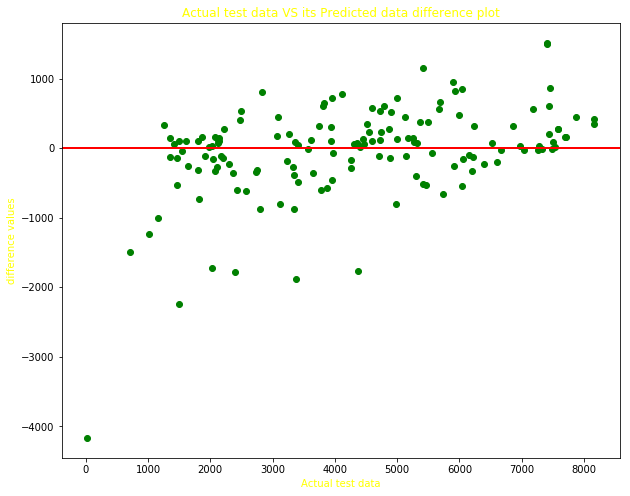

In [68]:
#visualizing the regression model for test data

plt.subplots(figsize=(10,8))
plt.scatter(y_t,y_t-y_pred,color='green')
plt.axhline(lw=2,color='red')
plt.title('Actual test data VS its Predicted data difference plot',color='yellow')
plt.xlabel('Actual test data',color='yellow')
plt.ylabel('difference values',color='yellow')
plt.show()


In [69]:
#cross_val_predict function is used to give the list of prediction values for training data set
from sklearn.model_selection import cross_val_predict

pred=cross_val_predict(rf,X,Y,cv=3)
len(pred)

584

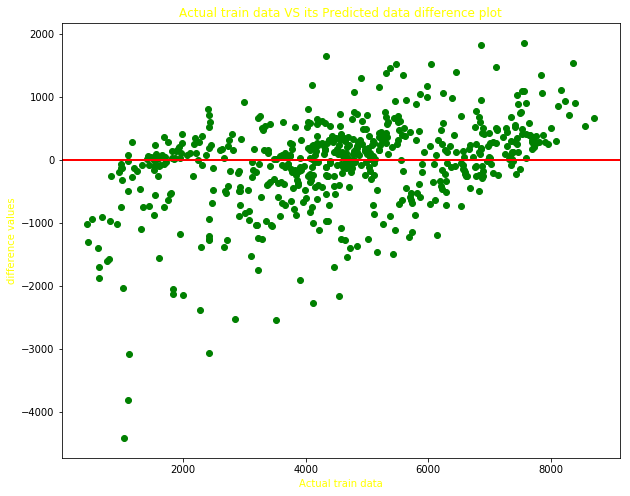

In [70]:
#visualizing the accuracy of regression model for train data

plt.subplots(figsize=(10,8))
plt.scatter(Y,Y-pred,color='green')
plt.axhline(lw=2,color='red')
plt.title('Actual train data VS its Predicted data difference plot',color='yellow')
plt.xlabel('Actual train data',color='yellow')
plt.ylabel('difference values',color='yellow')
plt.show()

**Observation:** 

Accuracy of training data set for random forest Regression = 98.4%

Accuracy of test data set predictions for random forest regression =86.3%

The scatter plots of data predictions for test data and train data are plotted respectively. All the predicted data values have a finite variance from the target line while some almost overlapped on the line itself. The variance in the test data plot looks more when contrasted with the train data plot predictions. This is because, the size of the test data is smaller and when entire minimum data prediction is projected against a bigger data prediction, the variances seems larger and reflects a decrease in the accuracy percentage for smaller data prediction plot. 


In [71]:
#randomly verifying the accuracy score of 5 training data points, 
#and checking its average prediction scores on a plot.

from sklearn.model_selection import cross_val_score

r2_scores = cross_val_score(rf, X, Y, cv=5)
print(r2_scores)

[0.91155767 0.85074903 0.81904414 0.79002151 0.89959905]


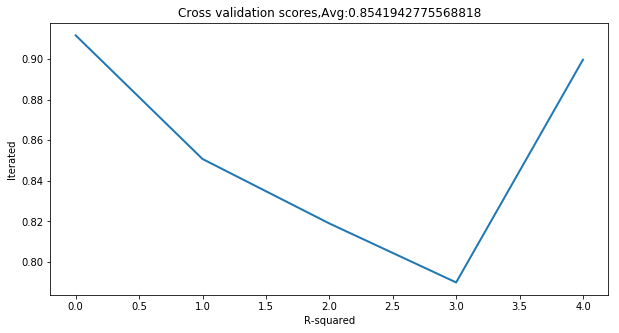

In [72]:
plt.subplots(figsize=(10,5))
plt.plot([i for i in range(5)],r2_scores,lw=2 )
plt.xlabel('R-squared')#coefficeint of determination
plt.ylabel('Iterated')
plt.title('Cross validation scores,Avg:{}'.format(np.average(r2_scores)))
plt.show()

When the randomly generated R-square coefficients are plotted, through the cross-validation process, the scores ranged between 0.79 to 0.91. So the average of these 5 data R-square values is also proving that the predictions of the Random Forest model are true with an accuracy of 86.34%

In [73]:
#evaluating the algorithm through root mean square and the mean absolute error
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_t, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_t, y_pred)))

Mean Absolute Error: 429.5409863945578
Root Mean Squared Error: 674.2434448875694



It is known that lower the root mean square error value, then better is the evaluating model. But here, the values of RMSE(root mean square error) value is in six hundred and MAE (mean absolute error) is in four hundred's respectively. The reason behind this is that 9 independent factors are influencing a dependent feature (rides count). And also, the dependent feature is a variable that has its value in the thousand's range. So, when the variances between each prediction are added, it produces a huge error sum value.

Thus it can be agreed that having greater values in this dataset evaluation process (for RMSE and MAE ) is a natural occurrence.

In [74]:
ridesdata.describe()

,Id,season,year,Month,is_holiday,weekday,is_workingday,Weather_condition,temp,atemp,Humidity,windspeed,casual_users,registered_users,rides_count
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


The following is the verification of whether the model has the power to predict the outcome of hypothetical instances. To describe this, applying the interpolation and extrapolation of data with the Random Forest Regression model to determine the ride count of that fictional instance.

In [0]:
#creating an instance that describes interpolation
#instance is a winter working day with least temperature and weather as cold and misty in year 2011

labels=['1']

interpolation_data= { 'Month':2, "weekday":1, "Humidity":0.000000,"temp":0.059130,
                     "windspeed":0.022392, "season_1":1,"season_2":0, "season_3":0,
                     "season_4":0,"is_holiday_0":1,"is_holiday_1":0,"is_workingday_0":0,
                     "is_workingday_01":1,"Weather_condition_1":1,"Weather_condition_2":0,
                     "Weather_condition_3":0,"year_0":1,"year_1":0
                    }

interpolation_df=pd.DataFrame(interpolation_data,index=labels)

# interpolation_df.info()

In [76]:
interpolation_pred=rf.predict(interpolation_df)

print("No of predicted rides for Interpolation data is :",interpolation_pred)

No of predicted rides for Interpolation data is : [1548.0975]


In [0]:
#creating an instance that describes extrapolation
#instance is a fall working day with moderate temperature and weather as partly cloudy in year 2013

labels=['1']

extrapolation_data= { 'Month':5, "weekday":5, "Humidity":0.796081,"temp":0.451130,
                     "windspeed":0.623920, "season_1":0,"season_2":0, "season_3":1,
                     "season_4":0,"is_holiday_0":0,"is_holiday_1":1,"is_workingday_0":0,
                     "is_workingday_01":1,"Weather_condition_1":0,"Weather_condition_2":0,
                     "Weather_condition_3":1,"year_0":0,"year_1":0   
                    }

extrapolation_df=pd.DataFrame(extrapolation_data,index=labels)

In [78]:
extrapolation_pred=rf.predict(extrapolation_df)

print("No of predicted rides for extrapolation data is :",extrapolation_pred)

No of predicted rides for extrapolation data is : [3702.13583333]


**Observations:**

Given a worst-case fictional scenario for interpolation example, the model properly predicts an estimation of 1548 rides on a bad weather day in the winter season. And also when given a moderate scenario for extrapolation, like a good temperature and a partly cloudy day in the fall season, approximately predicts that rides on this could be around 3700. As this model predicts rides with an accuracy of over 85%, it can be trusted that these forecasted values can have a maximum deviation of 15% or even less when confronted.

**Conclusion:**

From all the above validations and verification of predictions from the model, it is highly recommended that this bike-sharing data set aptly applies with the Random Forest Regression model. It is a good choice to predict the rides count on any day with any given environment and weather conditions with an accuracy of around 86%. This is also the only algorithm that satisfies the target predictions and trend of bikes movement with more reliability when compared with other algorithms.

**Summary:**

To find the best suitable algorithm for the bike-sharing dataset, a list of regression algorithms are tried on the scrubbed data frame of this dataset. Of all the regression algorithms, the Random Forest Regression gave the best accuracy results when applied to the data. To implement the algorithm step by step, the data needs to be prepared in such a way that it is split into training data and testing data. Initially, the training data set is used to train the model by feeding with labelled output data and the RF algorithm. Secondly, the test data set is given to predict the outputs from the model and compare the results of unlabelled test data output with actual output. This comparison score would depict the coefficient of determination or accuracy of the RF modelling algorithm. For better amplification, this data is visualized by comparing the variances of predictions to the target values in both training and testing data sets. A series of statistical analysis and score validations proves the credibility of the Random Forest Algorithm on this dataset. From the output predictions of illusory scenarios in interpolation and extrapolation, the RF model is substantiating the future instances. Although the random forest algorithm is a complex meta-solution decider, it's easy to implement on this dataset. The only limitation in this dataset for the model is that the dependent feature relies on multiple correlated independent features, which makes the model to predict the potential accuracy of the fictional instances graphically.
Henceforth, it can be stated that any city with a likewise atmospheric and climate conditions in this dataset, would follow a normal distribution of bike rides in a year. And through the Random Forest Regression algorithm, the model is strong enough to predict the best outcome from the given data than any other algorithms.
